# Computer Vision - P4

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): November 24th, 23:00 h** 

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

In this laboratory we will treat the following main topics:

1) Template matching
    - Normalized Cross-correlation
    - Application to object (eye) detection 

2) Image Descriptors: "Sliding window" and HOG image descriptor
   - Application to object (person) detection

3) Image matching (recognition by correspondance) based on feature extraction (ORB)
    - Application to object (logo) detection
    
In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

All code should be commented in English. Answers of the questions and comments on the exercises should be given in English too.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

## 1 Template matching

1.1 Given the image 'einstein.png' and the template image 'eye.png', detect the location of the template in the image comparing the use of:
- euclidean distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

In [2]:
#visualize
def visualize2(tigre_f,tigre_x,label1,label2):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,2,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,2,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    
def visualize3(tigre_f,tigre_x,tigre_xb,label1,label2,label3):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,3,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,3,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    fig.add_subplot(1,3,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre_xb, cmap='gray')


def visualize4(tigre1,tigre2,tigre3,tigre4,label1,label2,label3,label4):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,4,1)
    plt.title(label1)
    plt.imshow(tigre1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,4,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre2, cmap='gray')
    fig.add_subplot(1,4,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre3, cmap='gray')
    fig.add_subplot(1,4,4)
    plt.xticks([])
    plt.yticks([])
    plt.title(label4)
    plt.imshow(tigre4, cmap='gray')




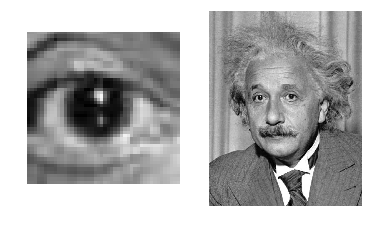

In [3]:
# Show the original image and the template image
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

eye=io.imread('./images/eye.png')
plt.imshow(eye)
plt.axis('off')

plt.subplot(1,2,2)
einstein=io.imread('./images/einstein.png')
plt.imshow(einstein)
plt.axis('off')

plt.show()



In [2]:
einstein.shape

(762, 595, 4)

1.1. Create a function for template matching applying euclidean distance and normalized cross-correlation and display the results in this format:
    
<img src="images_notebook/tm.png" width="400" height="120">

**Use titles in all figures to understand what is being displayed.**

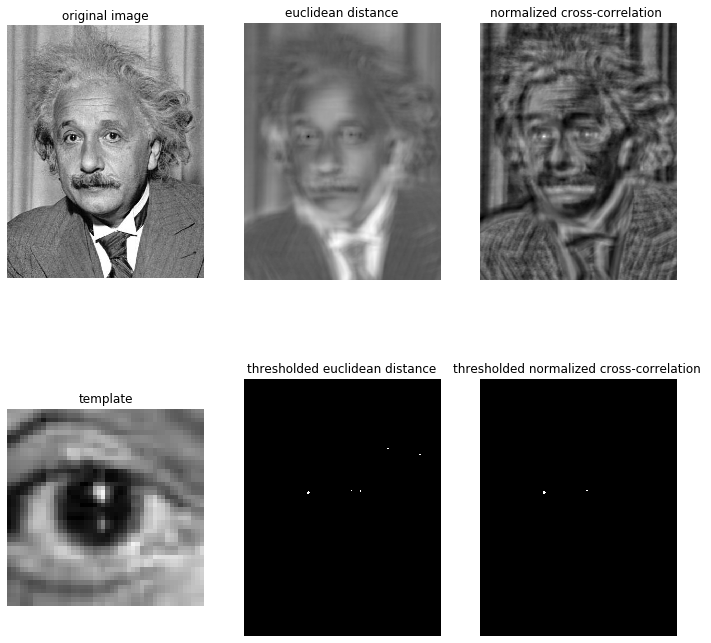

In [3]:
'''Solution'''

from skimage import img_as_float
from skimage import transform 
from skimage.color import rgb2gray
from skimage.feature import match_template

def template_matching(einstein,eye):
    image=rgb2gray(einstein)
    eye=rgb2gray(eye)
    eye=eye/eye.max()
    image=image/image.max()

    sz=image.shape
    height=sz[0]
    width=sz[1]
    sz_eye=eye.shape
    height_eye=sz_eye[0]
    width_eye=sz_eye[1]

    im_res=20*np.ones((image.shape[0]-height_eye,image.shape[1]-width_eye))

    h2=round(height_eye/2)
    w2=round(width_eye/2)

    # Using euclidean distance
    for i in range(height-height_eye-1):
        for j in range(width-width_eye-1):
            im_res[i,j]=np.linalg.norm(image[i:i+height_eye,j:j+width_eye]-eye[:,:])
            
    # Using normalized cross-correlation
    result = match_template(image, eye)
    ij = np.unravel_index(np.argmax(result), result.shape)
    x, y = ij[::-1]
    return im_res, result

   
def visualize_template(image, image2, im_res, result, thres_dist_eucl=0.3, thres_cross_correl=0.55):
    im_res=(im_res-im_res.min())/(im_res.max()-im_res.min())
    
    
    fig=plt.figure(figsize=(12,12))

    ax1=fig.add_subplot(2,3,1)
    plt.imshow(image, cmap='gray')
    plt.title('original image')
    plt.axis('off')
    
    fig.add_subplot(2,3,4)
    plt.imshow(image2, cmap='gray')
    plt.title('template')
    plt.axis('off')
    
    fig.add_subplot(2,3,2)
    plt.imshow(im_res, cmap='gray')
    plt.title('euclidean distance')
    plt.axis('off')
    
    fig.add_subplot(2,3,5)
    plt.imshow(im_res<thres_dist_eucl, cmap='gray')
    plt.title('thresholded euclidean distance')
    plt.axis('off')
    
    fig.add_subplot(2,3,3)
    plt.imshow(result, cmap='gray')
    plt.title('normalized cross-correlation ')
    plt.axis('off')
    
    fig.add_subplot(2,3,6)
    plt.imshow(abs(result)>thres_cross_correl, cmap='gray')
    plt.title('thresholded normalized cross-correlation ')
    plt.axis('off')
    
    plt.show()

    
im_res, result = template_matching(einstein,eye)
visualize_template(einstein, eye, im_res, result)

How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)? To this purpose, read the images "einstein_br.png" and "einstein_mask.png".

Visualize the normalized cross-correlation image between the template and the image as well as this very same image in a binarized form in order to show where is the minimal distance between the template and the image. 

Use titles of the figures to explain what is displayed.


1.2 Display the results on `einstein_br.png`:

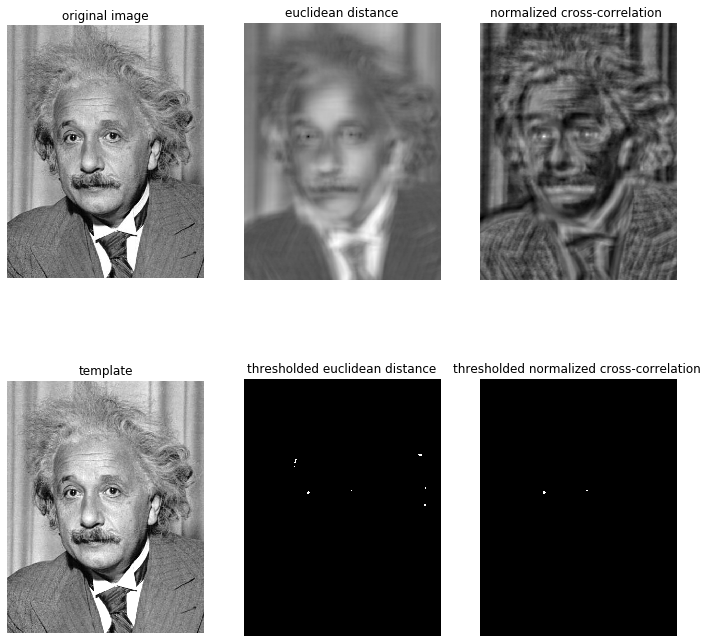

In [4]:
'''Solution'''

einstein_br=rgb2gray(io.imread('./images/einstein_br.png'))

im_res, result=template_matching(einstein_br,eye)
visualize_template(einstein, einstein_br, im_res,result)

1.3 Display the results on `einstein_mask.png`:

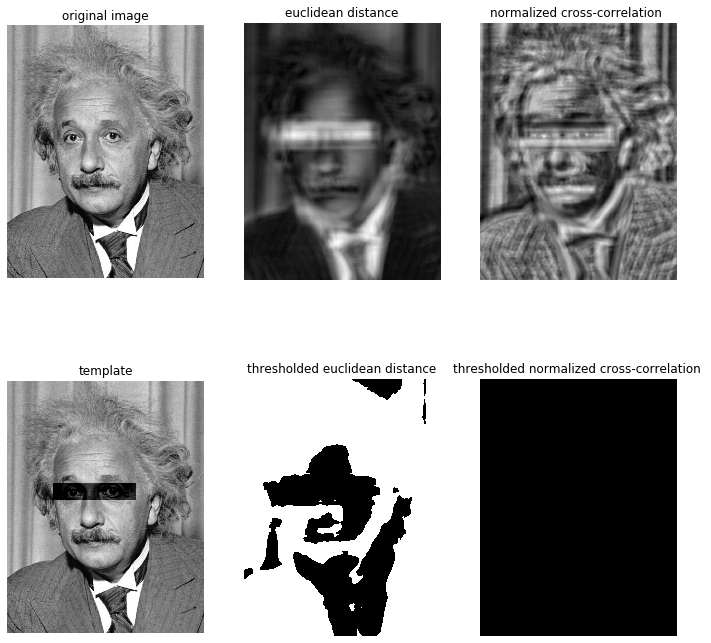

In [5]:
'''Solution'''

einstein_mask=rgb2gray(io.imread('./images/einstein_mask.png'))
einstein_mask=einstein_mask/einstein_mask.max()

im_res, result=template_matching(einstein_mask,eye)
visualize_template(einstein, einstein_mask, im_res,result)

1.4.
* How does the minimum distance between the template and the image change? 
* What are the minimal distance pixels in the correlation images? 
* What are the distances between the template and the image around the eyes of the image? 

1.5 How does the result of the template matching change if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the 'eye_br.png' template.

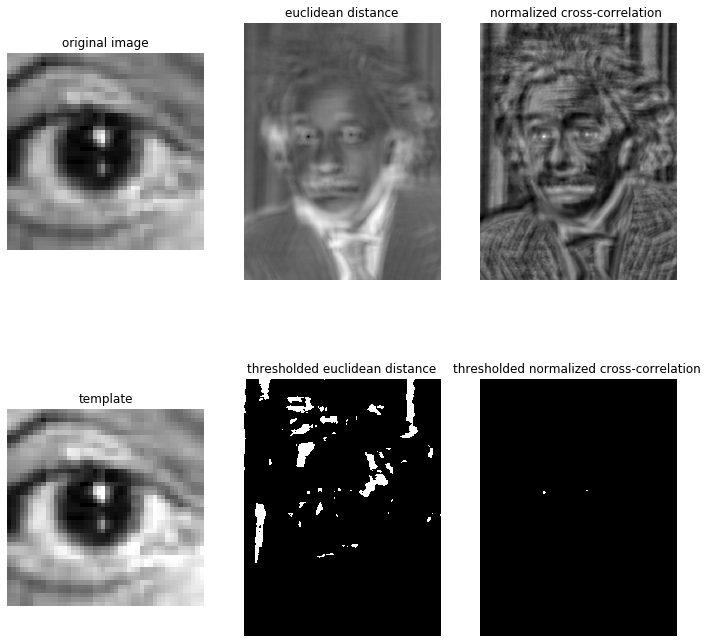

In [6]:
'''Solution'''

eye_br=rgb2gray(io.imread('./images/eye_br.png'))

im_res, result=template_matching(einstein,eye_br)
visualize_template(eye, eye_br, im_res,result)

1.6 Check how the result changes if the template is rotated. Visualize the template and its rotation by 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation.
Help: use the function rotate() in skimage.transform

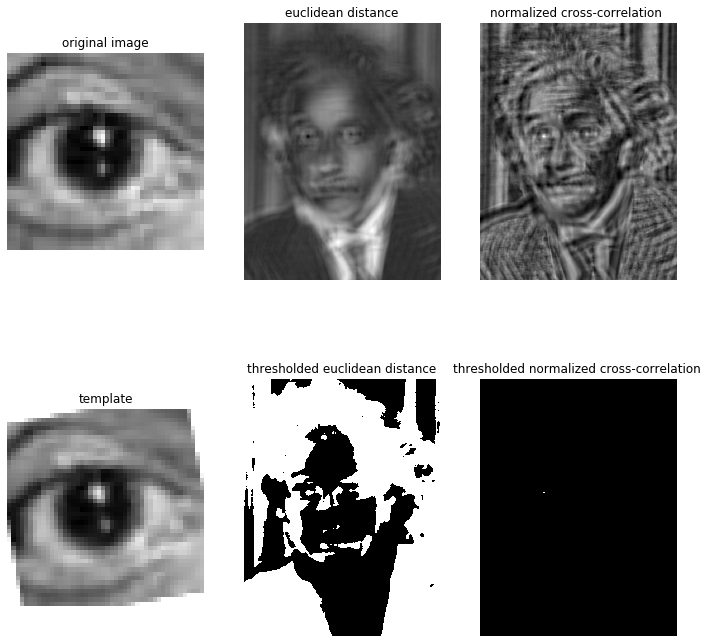

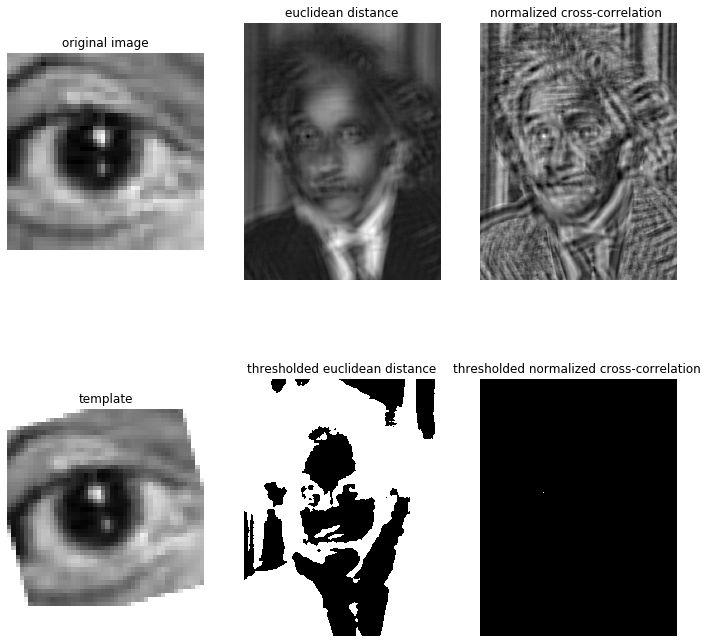

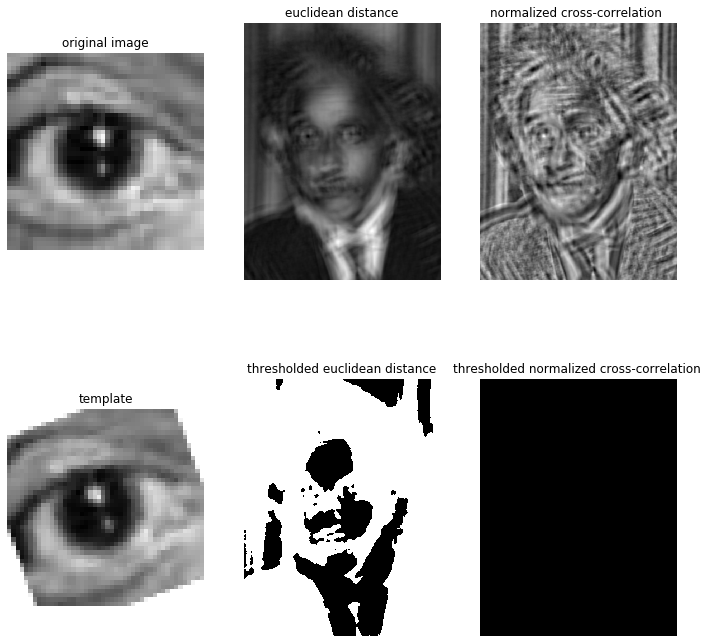

In [7]:
'''Solution'''
from skimage.transform import rotate

eye_r=rotate(eye,10)
im_res, result=template_matching(einstein,eye_r)
visualize_template(eye, eye_r, im_res,result)

eye_r=rotate(eye,15)
im_res, result=template_matching(einstein,eye_r)
visualize_template(eye, eye_r, im_res,result)

eye_r=rotate(eye,20)
im_res, result=template_matching(einstein,eye_r)
visualize_template(eye, eye_r, im_res,result)


1.7 Comment what is the template matching process, what advantages and disadvantages it has, how sensible is to image deformation in photometric and spatial dimensions, what parameters it has and which measure for image comparisons works better.

# 2 Histogram of Oriented Gradients

In this section we will treat the following topic: HOG image descriptor. Application to object (person) detection.

The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image 'person_template.png' and the folder '/images/TestPersonImages/', apply the HOG descriptor in order to detect where there is a person in the images. To this purpose, apply the "sliding window" technique. We use images from GRAZ 01 data from [INRIA datasets](http://pascal.inrialpes.fr/data/human/).

2.1. Read the template ('person_template.png'), obtain its HOG descriptor (with the optimal parameters) and visualize it.

Help: the HOG detector function is in the skimage.feature library ([Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py)).

In [8]:
'''Solution'''
import numpy as np
import skimage as sk
from skimage import io
from matplotlib import pyplot as plt
from skimage.feature import hog
from skimage import exposure
from numpy import linalg as LA


def get_hog(image,show=False, hog_return = False):
    
    image = sk.color.rgb2gray(image)
    
    #Applying the HOG method defined in SciPy to the image with, in our opinion, the optimal parameters.
    
    fd, hog_image =hog(image, orientations=8, pixels_per_cell=(6, 6), cells_per_block=(3, 3), visualize=True, multichannel=False)
    
    if show:
        #Plotting the result
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
        
        ax1.axis('off')
        ax1.imshow(image, cmap=plt.cm.gray)
        ax1.set_title('Input image')
        
        # Rescale histogram for better display
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 50))
        
        ax2.axis('off')
        ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
        ax2.set_title('Histogram of Oriented Gradients')
        plt.show()
    else:
        if hog_return:
            #Obtaining the hog_image
            return hog_image
        #Obtaining the image descriptor
        return fd



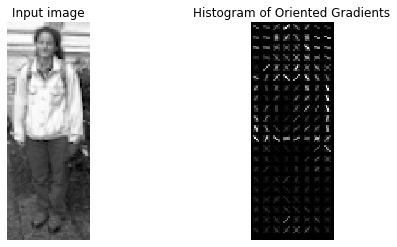

(129, 49, 4)


In [9]:
image = io.imread('images/person_template.bmp')
get_hog(image,True)
print(image.shape)

2.2. Apply the HOG descriptor on the complete set of images for person detection.

a) Read images from the folder "TestPersonImages", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the person template. 

b) Visualize the location in the image that is the most similar to the person template using the distance between the template and test image descriptors.

Display the results of every person detection following this format:

<img src="images_notebook/hog.png" width="800" height="100">

In [10]:
#Applying the sliding window method to the hogs obtaining the euclidean difference and the dot product between them
def get_dist_matrix(tmpl_descriptor, tmpl_img, img):
    
    # Create the output matrices of size original image size - template size:
    descriptor_eucl_matrix = np.empty((img.shape[0]-tmpl_img.shape[0],img.shape[1]-tmpl_img.shape[1]),dtype='float')
    descriptor_dot_matrix = np.empty((img.shape[0]-tmpl_img.shape[0],img.shape[1]-tmpl_img.shape[1]),dtype='float')
    
    """
    print(img.shape)
    print(tmpl_img.shape)
    print(descriptor_eucl_matrix.shape) # (21,64)
    print(descriptor_eucl_matrix) # (21,64)
    """
    
    # Transform images to gray scale
    tmpl_img = sk.color.rgb2gray(tmpl_img)
    img = sk.color.rgb2gray(img)

    # Make an step = 5 for the sliding window
    stepSize = 1
    
    for i in range(0, descriptor_eucl_matrix.shape[0], stepSize): # de 0 a 21
        for j in range(0, descriptor_eucl_matrix.shape[1], stepSize):    
    
            window = img[i:tmpl_img.shape[0]+i,j:tmpl_img.shape[1]+j]
            
            window_descriptor = get_hog(window)
            
            descriptor_eucl_matrix[i][j] = LA.norm(window_descriptor-tmpl_descriptor)
            descriptor_dot_matrix[i][j] = np.dot(window_descriptor,tmpl_descriptor)
    
    return descriptor_eucl_matrix, descriptor_dot_matrix



(8208,)


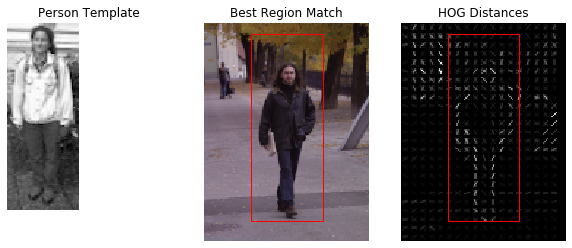

In [11]:
# Extract HOG descriptor of the template image
tmpl_img = io.imread('images/person_template.bmp')
tmpl_img = sk.color.rgb2gray(tmpl_img)
tmpl_rows,tmpl_cols = tmpl_img.shape

tmpl_descriptor = get_hog(tmpl_img)
print(tmpl_descriptor.shape)

# Extract HOG descriptor of the windows of the test image and compute the distance to the template descriptor.
img = io.imread('images/TestPersonImages/person_014.bmp')
hog_image_result = get_hog(img,False,True)

# Compute distances from sliding window to template:
descriptor_eucl_matrix, descriptor_dot_matrix = get_dist_matrix(tmpl_descriptor,tmpl_img,img)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10), sharex=True, sharey=True)

# We need the position of the minimun distance  
# xeucl,yeucl is the position of the minimum value of the matrix of distances
eucl_position = np.unravel_index(np.argmin(descriptor_eucl_matrix), descriptor_eucl_matrix.shape)
xeucl, yeucl = eucl_position[::-1]

dot_position = np.unravel_index(np.argmax(descriptor_dot_matrix), descriptor_dot_matrix.shape)
xdot, ydot = dot_position[::-1]

#Plotting the car template
ax1.imshow(tmpl_img,cmap='gray')
ax1.set_axis_off()
ax1.set_title('Person Template')

ax2.imshow(img,cmap='gray')
ax2.set_axis_off()
ax2.set_title('Best Region Match')
rect = plt.Rectangle((xdot,ydot),tmpl_cols,tmpl_rows,edgecolor='r',facecolor = 'None')
ax2.add_patch(rect)

ax3.imshow(exposure.rescale_intensity(hog_image_result,in_range=(0,50)),cmap=plt.cm.gray)
ax3.set_axis_off()
ax3.set_title('HOG Distances')
rect = plt.Rectangle((xdot,ydot),tmpl_cols,tmpl_rows,edgecolor='r',facecolor = 'None')
ax3.add_patch(rect)
    
    
plt.show()

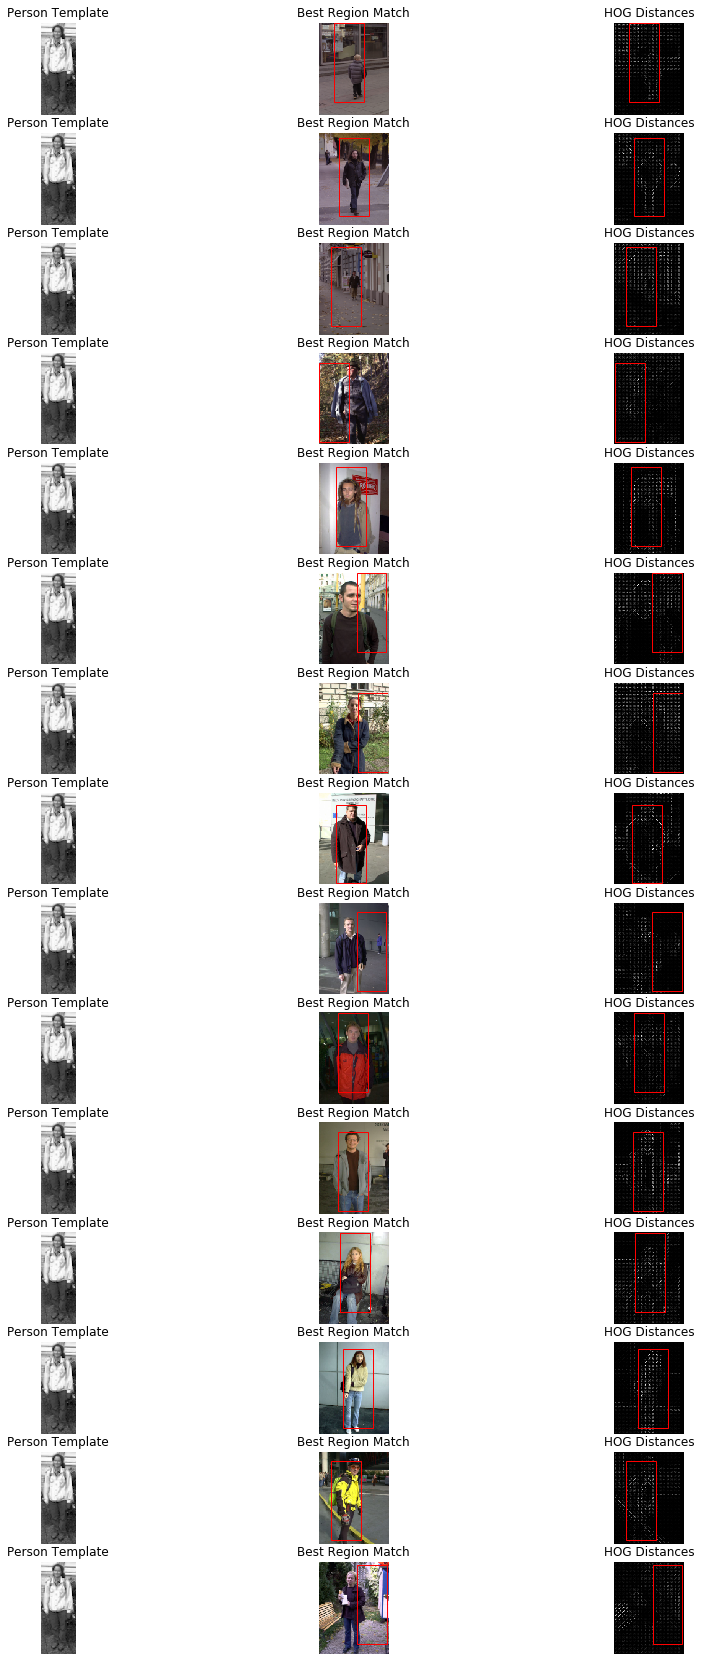

In [12]:
# Test images

tmpl_img = io.imread('images/person_template.bmp')
tmpl_img = sk.color.rgb2gray(tmpl_img)
tmpl_rows,tmpl_cols = tmpl_img.shape
tmpl_descriptor = get_hog(tmpl_img)
ic = io.ImageCollection('images/TestPersonImages/*.bmp')

#Plotting the result for 10 images.
f,axarray = plt.subplots(nrows = 15,ncols=3, figsize=(15,30))
i= 0
for img in ic[:15]:
    hog_image_result = get_hog(img,False,True)
    descriptor_eucl_matrix,descriptor_dot_matrix = get_dist_matrix(tmpl_descriptor,tmpl_img,img)
    
    #We need the position of the minimun distance  
    # xeucl,yeucl is the position of the minimum value of the matrix
    eucl_position = np.unravel_index(np.argmin(descriptor_eucl_matrix), descriptor_eucl_matrix.shape)
    xeucl, yeucl = eucl_position[::-1]
    
    dot_position = np.unravel_index(np.argmax(descriptor_dot_matrix), descriptor_dot_matrix.shape)
    xdot, ydot = dot_position[::-1]
    
    #Plotting the car template
    axarray[i][0].imshow(tmpl_img,cmap='gray')
    axarray[i][0].set_axis_off()
    axarray[i][0].set_title('Person Template')
        
    axarray[i][1].imshow(img,cmap='gray')
    axarray[i][1].set_axis_off()
    axarray[i][1].set_title('Best Region Match')
    rect = plt.Rectangle((xdot,ydot),tmpl_cols,tmpl_rows,edgecolor='r',facecolor = 'None')
    axarray[i][1].add_patch(rect)
    
    axarray[i][2].imshow(exposure.rescale_intensity(hog_image_result,in_range=(0,50)),cmap=plt.cm.gray)
    axarray[i][2].set_axis_off()
    axarray[i][2].set_title('HOG Distances')
    rect = plt.Rectangle((xdot,ydot),tmpl_cols,tmpl_rows,edgecolor='r',facecolor = 'None')
    axarray[i][2].add_patch(rect)
    
    i+=1
plt.show()

3.3. 
- Count on how many images were the persons detected correctly and discuss the failures. What do you think can be the reasons for the failures?
- Discuss what are the parameters of the HOG algorithm. Test several values of the parameters up to your criterion to show which are the optimal values for the person detection problem.
- Discuss which distance between template and test images have you used and why. Euclidean or dot distance?
- Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

Solution:

There are 5 errors over 15 test images.

It seems that there are different reasons, 
- 1 Low contrast
- 2, 3 the different scale
- 4 Two instances in the same image and detect just one, the farther one.
- 5 shadows producing gradients

HOG parameters:
- Cell size
- Block size
- Orientation = number of bins of the histogram

In [13]:
#The euclidean difference method is not the best algorithm in order to detect hog similarities. The reason is that 
#the euclidean distance do not measure the direction of the gradients measured in the hog image, only the gradient
#module,which is normalized in the hog. On the contrary, the dot product is more precise because it measures the 
#similarity between the direction of the two gradient vectors (if they are similar the value is close to 1, 0 otherwise).
#However, even the dot product has failures too. The reason could be due to interpolation errors in those 
#directions with angles between two bins.

#HOG: It is a feature descriptor for object detection. The technique counts ocurrences of gradient orientation in localized
#portions of an image. In our opinion, the optimal parameters to the person detection are the ones defined in the function get_hog.

#There are a lot of advantages using hog object detector instead of the template-based object detection.
    #The hog detector is invariant to any changes in contrast or ilumination, as the normalized cross correlation method
    #The hog detector is invariant to any linear transformation (rotations, scales or translations)
    #The hog detector gives us a feature descriptor of the image, which allow us to describe it (and allow us to develop
    #different descriptor algorithms to describe different images, like SIFT or ORB(Approximation of SIFT))

# 3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems: 
- feature location, 
- image feature description.

Let us focus on ORB, an approximation of SIFT method, and analyse if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images. 

3.1
(a) Detect the corners in the image `starbucks4.jpg`. 
Use `corner_fast` to extract FAST corners for the given image and `corner_peaks` to find corners in the corner measure response image.

Follow this example for visualization:

    fast= corner_fast(img)
    corner_points = corner_peaks(fast)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.scatter(corner_points[:, 1], corner_points[:, 0], facecolors='none', edgecolors='r')

Comment your code in detail.

(b) Analyze and discuss the effect of different values of the parameter `threshold` in the corner_fast function.



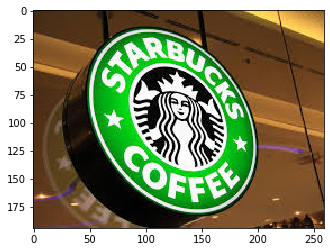

In [14]:
import numpy as np
import skimage as sk
from skimage import io
from matplotlib import pyplot as plt
from skimage import exposure
from skimage import transform as tf

from skimage.feature import (match_descriptors, corner_harris, corner_peaks, corner_fast, ORB, plot_matches)

import collections

#Exercise 3.1
img = io.imread('images/starbucks4.jpg')

plt.imshow(img)
plt.show()
img = sk.color.rgb2gray(img)



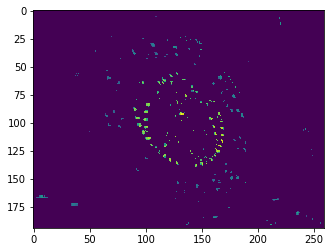

In [15]:
fast= corner_fast(img)
plt.imshow(fast)



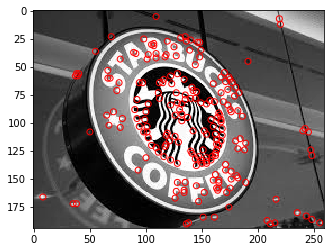

In [16]:
corner_points = corner_peaks(fast)
plt.imshow(img, cmap=plt.cm.gray)
plt.scatter(corner_points[:, 1], corner_points[:, 0], facecolors='none', edgecolors='r')


b) 'Solution'

The higher the threshold value is then fewer local features are detected. According to the scikit documentation:

> Threshold used in deciding whether the pixels on the circle are brighter, darker or similar w.r.t.
> the test pixel. Decrease the threshold when more corners are desired and vice-versa.

We consider that the threshold of 0.2 is pretty accurate. Values under 0.2 detect some edges as corners.



3.2 

(a) Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks4.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) above. 

Define a function get_ORB implementing the algorithm in order to be able to apply it on different images. Comment the code in detail.

**Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.**

(b) Analyze and discuss the effect of different values of the parameter `max_ratio` in the match_descriptors function.


In [17]:
# Explicar que ORB creates a class which is then filled by detect_and_extract function 
# (attributes keypoints and descriptors are computed)
# (python is object-oriented language)

In [18]:
'Solution'

#Function to obtain the keypoints of both images (according to Harris corner algortihm response) and the match descriptor
#matrix (Indices of corresponding matches in first and second set of descriptors, where matches[:, 0] denote the indices in 
# the first and matches[:, 1] the indices in the second set of descriptors.)
def get_ORB(img1,img2):
    img1 = sk.color.rgb2gray(img1)
    img2 = sk.color.rgb2gray(img2)
    
    descriptor_extractor = ORB(n_keypoints=200, fast_threshold=0.5)
    #fast_threshold=0.3, harris_k=0.04)

    #Obtaining the keypoints and the descriptor vector from the first image
    descriptor_extractor.detect_and_extract(img1)
    keypoints1 = descriptor_extractor.keypoints
    descriptors1 = descriptor_extractor.descriptors

    #Obtaining the keypoints and the descriptor vector from the second image
    descriptor_extractor.detect_and_extract(img2)
    keypoints2 = descriptor_extractor.keypoints
    descriptors2 = descriptor_extractor.descriptors
    
    #Generating the match descriptor matrix
    matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
    
    return matches12,keypoints1,keypoints2

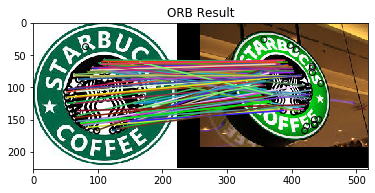

In [19]:
#Exercise 2
img1 = io.imread('images/starbucks.jpg')
img2 = io.imread('images/starbucks4.jpg')

#Plotting the ORB result
matches,keypoints1,keypoints2 = get_ORB(img1,img2)
f,axarray = plt.subplots()
plot_matches(axarray, img1,img2,keypoints1,keypoints2,matches)
axarray.set_title('ORB Result')
plt.show()

In [20]:
#Comments parameter max_ratio

#fast_thresholdfloat, optional
#The threshold parameter in feature.corner_fast. Threshold used to decide whether the pixels on the circle are brighter, darker or similar w.r.t. the test pixel. Decrease the threshold when more corners are desired and vice-versa.
#harris_kfloat, optional
#The k parameter in skimage.feature.corner_harris. Sensitivity factor to separate corners from edges, typically in range [0, 0.2]. Small values of k result in detection of sharp corners.


# fast_threshold=0.08, harris_k=0.04



3.2 Repeate the experiment comparing the "starbucks.jpg" image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when does the algorithm work better. 

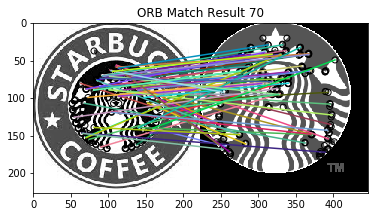

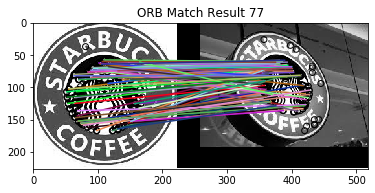

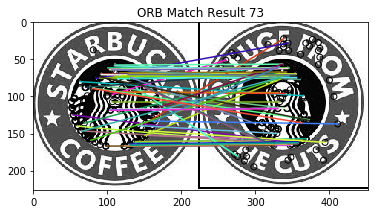

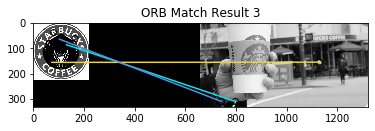

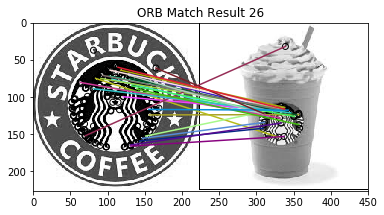

In [21]:
'''Solution'''


starbucks_model = io.imread('images/starbucks.jpg')
starbucks = []
starbucks.append(io.imread('images/starbucks2.png'))
starbucks.append(io.imread('images/starbucks4.jpg'))
starbucks.append(io.imread('images/starbucks5.png'))
starbucks.append(io.imread('images/starbucks6.jpg'))
starbucks.append(io.imread('images/starbucksCup.jpg'))

#Obtaining the different matches and keypoints from the comparison between the model image and the
#rest of them
matchm = []
keypoints = []
for i in range(5):
    m,keypointsm,k = get_ORB(starbucks_model,starbucks[i])
    matchm.append(m)
    keypoints.append(k)
    
#Plotting them
for i in range(5):
    f,axarray = plt.subplots()
    plot_matches(axarray, sk.color.rgb2gray(starbucks_model),sk.color.rgb2gray(starbucks[i]),keypointsm,keypoints[i],matchm[i])
    axarray.set_title('ORB Match Result ' + str(len(matchm[i])))
    plt.show()

Even taking into account that ORB is scale and rotate invariant, We get the best resuts when the two images have similar size and similar background. we observe that in the case of the 2 last pictures the matches weren't that accurate as the previous pictures.

3.3 Repeate the experiment in 3.2: 
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform 
- Change the scale and orientation of the scene image and compare it with the model image.

Help: To do so, you can use the function given below as example:

import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)

or

tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = tf.warp(image2transform, tform)

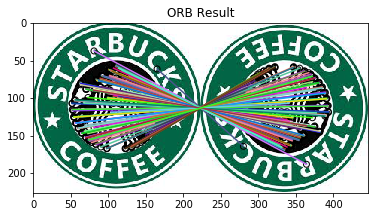

In [31]:
'''Solution'''

# - a ) Change the orientation of the model image by rotating it and compare it with its original version.
from skimage import transform as tf

model_rotated = tf.rotate(starbucks_model, 180)

# use defined funtion to match descriptors and show results
matches,keypoints1,keypoints2 = get_ORB(starbucks_model,model_rotated)
f,axarray = plt.subplots()
plot_matches(axarray, starbucks_model,model_rotated,keypoints1,keypoints2,matches)
axarray.set_title('ORB Result')
plt.show()



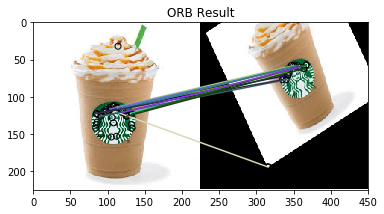

In [32]:
'''Solution'''

# - b ) Change the scale and orientation of the scene image and compare it with its original version.
tform = tf.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                           translation=(0, -20))

starbucks_image_scene = io.imread('images/starbucksCup.jpg')


model_transformed = tf.warp(starbucks_image_scene, tform)

matches,keypoints1,keypoints2 = get_ORB(starbucks_image_scene,model_transformed)
f,axarray = plt.subplots()
plot_matches(axarray, starbucks_image_scene,model_transformed,keypoints1,keypoints2,matches)
axarray.set_title('ORB Result')
plt.show()



3.4 **(Optional)** Repeat the experiment (3.1 to 3.3) with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.



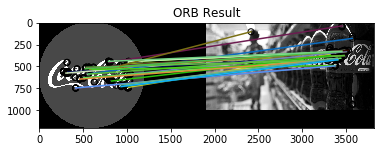

In [34]:
#We repeat the same process with cocacola images


cocacola_model = sk.color.rgb2gray(io.imread('images/CocaColaImages/cocacola_logo.png'))
cocacola_2 = sk.color.rgb2gray(io.imread('images/CocaColaImages/cocacola3.jpg'))

matches,keypoints1,keypoints2 = get_ORB(cocacola_model,cocacola_2)
f,axarray = plt.subplots()
plot_matches(axarray, cocacola_model,cocacola_2,keypoints1,keypoints2,matches)
axarray.set_title('ORB Result')
plt.show()

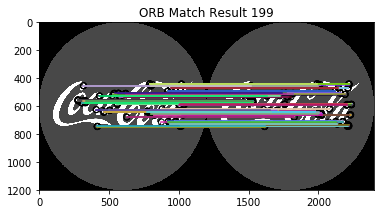

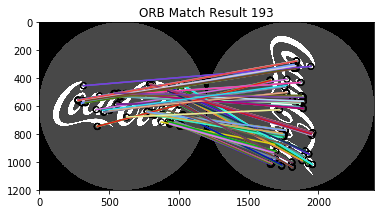

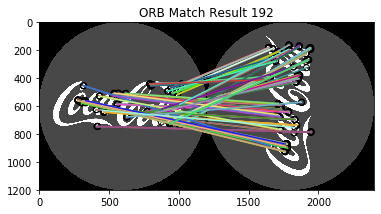

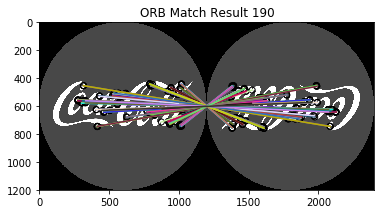

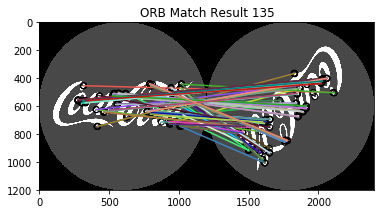

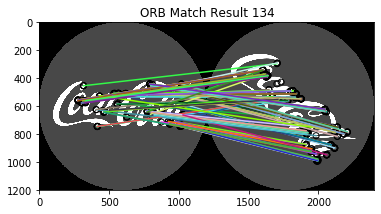

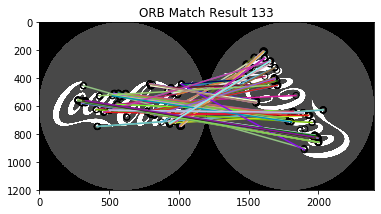

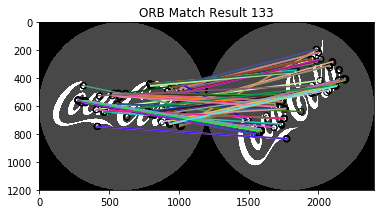

In [35]:

#Comparing the model image with rotations of these
model_image = io.imread('images/CocaColaImages/cocacola_logo.png')
ic = [tf.rotate(model_image,45*i) for i in range(8)]

matches = []
matching = []
keypoints1 = []
keypoints2 = []

for i in range(8):
    match,keypointsm,keypointsr = get_ORB(model_image,ic[i])
    matches.append((len(match),i))
    matching.append(match)
    keypoints1.append(keypointsm)
    keypoints2.append(keypointsr)


for position in [sorted(matches,reverse=True)[i][1] for i in range(len(matches))]:
    if position == 0:
        f,axarray = plt.subplots()
        plot_matches(axarray, sk.color.rgb2gray(model_image),sk.color.rgb2gray(ic[0]),keypoints1[0],keypoints2[0],matching[0])
        axarray.set_title('ORB Match Result ' + str(matches[0][0]))
        plt.show()
    elif position == 1:
        f,axarray = plt.subplots()
        plot_matches(axarray, sk.color.rgb2gray(model_image),sk.color.rgb2gray(ic[1]),keypoints1[1],keypoints2[1],matching[1])
        axarray.set_title('ORB Match Result ' + str(matches[1][0]))
        plt.show()
    elif position == 2:
        f,axarray = plt.subplots()
        plot_matches(axarray, sk.color.rgb2gray(model_image),sk.color.rgb2gray(ic[2]),keypoints1[2],keypoints2[2],matching[2])
        axarray.set_title('ORB Match Result ' + str(matches[2][0]))
        plt.show()
    elif position == 3:
        f,axarray = plt.subplots()
        plot_matches(axarray, sk.color.rgb2gray(model_image),sk.color.rgb2gray(ic[3]),keypoints1[3],keypoints2[3],matching[3])
        axarray.set_title('ORB Match Result ' + str(matches[3][0]))
        plt.show()
    elif position == 4:
        f,axarray = plt.subplots()
        plot_matches(axarray, sk.color.rgb2gray(model_image),sk.color.rgb2gray(ic[4]),keypoints1[4],keypoints2[4],matching[4])
        axarray.set_title('ORB Match Result ' + str(matches[4][0]))
        plt.show()
    
    elif position == 5:
        f,axarray = plt.subplots()
        plot_matches(axarray, sk.color.rgb2gray(model_image),sk.color.rgb2gray(ic[5]),keypoints1[5],keypoints2[5],matching[5])
        axarray.set_title('ORB Match Result ' + str(matches[5][0]))
        plt.show()
    
    elif position == 6:
        f,axarray = plt.subplots()
        plot_matches(axarray, sk.color.rgb2gray(model_image),sk.color.rgb2gray(ic[6]),keypoints1[6],keypoints2[6],matching[6])
        axarray.set_title('ORB Match Result ' + str(matches[6][0]))
        plt.show()
        
    else:
        f,axarray = plt.subplots()
        plot_matches(axarray, sk.color.rgb2gray(model_image),sk.color.rgb2gray(ic[7]),keypoints1[7],keypoints2[7],matching[7])
        axarray.set_title('ORB Match Result ' + str(matches[7][0]))
        plt.show()



3.5 Analysis of the applied techniques and results

- What are the advantages of the ORB object detection with respect to the HOG and template object detector?

- What would happen if you analyse an image that does not contain the Starbucks logo? 

- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it) 

In [36]:
#1
# The ORB detector is fast, computational efficient and real time and low power device comparing to
# the HOG detector and template object detector (although the template object detector is fast, it 
# gives us worse results comparing to the ORB one).

Length match descriptor matrix: 61


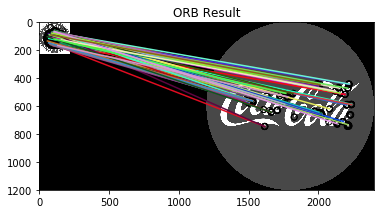

Length match descriptor matrix: 75


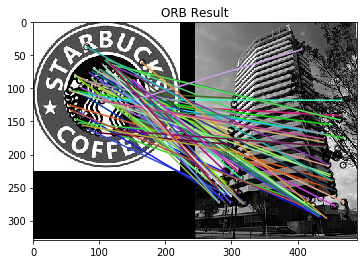

In [38]:
starbucks = sk.color.rgb2gray(io.imread('images/starbucks.jpg'))
cocacola = sk.color.rgb2gray(io.imread('images/CocaColaImages/cocacola_logo.png'))
edificio = sk.color.rgb2gray(io.imread('images/edificio.jpg'))

matches,keypoints1,keypoints2 = get_ORB(starbucks,cocacola)
f,axarray = plt.subplots()
plot_matches(axarray, starbucks,cocacola,keypoints1,keypoints2,matches)
print('Length match descriptor matrix: ' + str(len(matches)))
axarray.set_title('ORB Result')
plt.show()

#We compare the starbucks logo and the cocacola logo. It relates correctly the letters of both logos, and that is
#why there is some correlation between them

matches,keypoints1,keypoints2 = get_ORB(starbucks,edificio)
f,axarray = plt.subplots()
plot_matches(axarray, starbucks,edificio,keypoints1,keypoints2,matches)
print('Length match descriptor matrix: ' + str(len(matches)))
axarray.set_title('ORB Result')
plt.show()

#However, the length of the match descriptor is not the best way to determine if two images are correlated,
#and this comparison is a good example of an ORB failure positive matches.

In [39]:
# Another way to compare images could be the Hausdorff distance. It measures the 
# extent to which each point of a "model" set lies near some point of an "image" 
# set and vice versa. Thus, this distance can be used to determine the degree
# of the resemblance between two objects that are superimposed on one another.
# In this way, We could generate algorithms to compute the Hausdorff distance 
# between all possible relative positions of a binary image and a model.

### Appendix

In [40]:
# In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)